In [7]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#Generating 100 random standard normal numbers
dataset = np.random.normal(0,1,100)
dataset

array([-0.48278961, -0.57893709, -1.08101465, -0.46628288,  0.12707792,
        1.51126347,  1.19374126,  1.08010582, -0.375173  , -1.15080831,
        1.71301749,  0.09939873, -0.28872087,  1.53486342,  0.22373611,
        0.72369584, -0.78703805, -0.85472035, -0.66685036, -0.63380387,
        0.60738232,  1.5053806 , -1.14363738, -1.18351388, -0.39736659,
       -0.2686449 , -0.03853511,  1.34396511,  0.46862999,  3.12556303,
       -1.18983113, -2.17098328, -0.69867161, -0.6134395 , -0.09976413,
       -1.29008121,  0.46353412, -1.5069699 ,  1.98358119, -0.6179278 ,
       -1.01500224,  0.0646751 , -0.63426211, -0.57695852, -0.4935635 ,
        1.63753086, -0.07200246, -0.4781285 , -0.37444335,  0.38570585,
       -1.76133671,  0.19959451,  2.22648455,  0.26726571, -0.24953501,
       -0.80452463, -1.06548888, -0.21772971,  1.51959624, -0.29822174,
        0.3134002 , -1.14475122,  0.2265906 ,  0.2505393 , -0.4856526 ,
        2.19053115,  0.45291936,  1.10954627,  0.94621124, -1.08

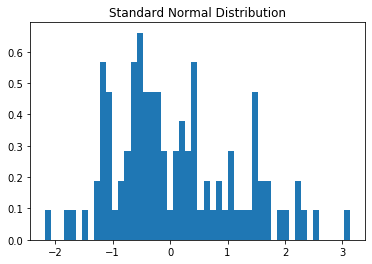

In [8]:
plt.hist(dataset, bins=50, density=1)
plt.title('Standard Normal Distribution')
plt.show()

In [9]:
#sorting the data
data_sorted = np.sort(dataset)
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]

In [10]:
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(len(dataset))/len(dataset)

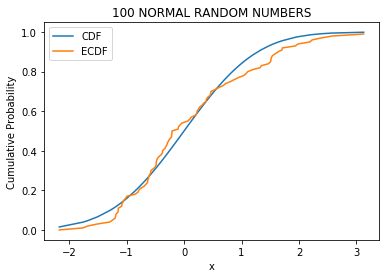

In [11]:
#Plotting the CDF and ECDF values on a curve
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.title('100 NORMAL RANDOM NUMBERS')

plt.plot(data_sorted, CDF)
plt.plot(data_sorted, ECDF)

plt.legend(['CDF', 'ECDF'])

In [36]:
# Applying KS test on an actual dataset
#Importing data
test_data = pd.read_csv('test.csv')
test_data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0
844,4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0
845,4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN
846,4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0


In [13]:
#Extracting BMI data
bmi_data = test_data.BMI
bmi_data

0      24.42
1      28.61
2      25.56
3      23.40
4      25.81
       ...  
843    27.42
844    23.08
845    26.41
846    22.86
847    23.44
Name: BMI, Length: 848, dtype: float64

Text(0, 0.5, 'Frequency')

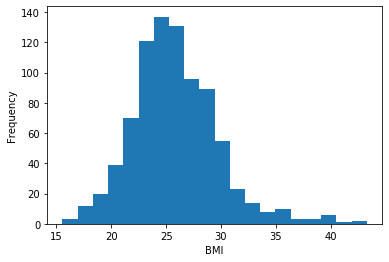

In [35]:
#The mean and standard deviation have been obtained from previous years data for the entire population.
mean, std = 25.3,3.9
plt.hist(bmi_data, bins=20)
plt.xlabel('BMI')
plt.ylabel('Frequency')

In [21]:
#Finding CDF
bmi_data_sorted = np.sort(bmi_data)
bmi_data_sorted = bmi_data_sorted[~np.isnan(bmi_data_sorted)]
bmi_data_sorted_normal = (bmi_data_sorted - mean)/std
cdf_null_hyp = [st.norm.cdf(bmi) for bmi in bmi_data_sorted_normal]

In [22]:
#Finding the observed test statistic
bmi_data = bmi_data[~np.isnan(bmi_data)]
bmi_edf = np.arange(1/len(bmi_data), 1+1/len(bmi_data), 1/len(bmi_data))
#calculate absolute difference
bmi_dif_abs = np.abs(cdf_null_hyp-bmi_edf)
#get max different
dn_ks = max(bmi_dif_abs)
dn_ks

0.06654647919876744

In [23]:
#Finding critical value of test statistic considering level of signifance as alpha = 0.05
dn_crit = 1.36/np.sqrt(len(bmi_data))
dn_crit

0.04684088814164377

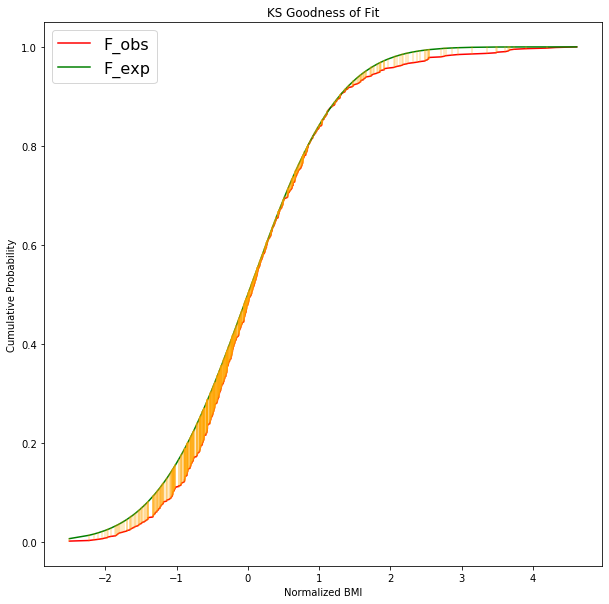

In [24]:
# Plotting the ECDF and CDF curves
plt.figure(figsize=(10, 10))
plt.plot(bmi_data_sorted_normal, bmi_edf, label='F_obs', color='red')
plt.plot(bmi_data_sorted_normal, cdf_null_hyp, label='F_exp', color = 'green')
for x, y1, y2 in zip(bmi_data_sorted_normal, bmi_edf, cdf_null_hyp):
    plt.plot([x, x], [y1, y2], color='orange',alpha = 0.3)
plt.legend(fontsize = 16)
plt.ylabel("Cumulative Probability")
plt.xlabel('Normalized BMI')
plt.title("KS Goodness of Fit")
plt.show()